In [1]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [2]:
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()

# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

print('X_train: ' + str(trainX.shape))
print('Y_train: ' + str(trainY.shape))
print('X_test:  '  + str(testX.shape))
print('Y_test:  '  + str(testY.shape))

X_train: (60000, 28, 28, 1)
Y_train: (60000,)
X_test:  (10000, 28, 28, 1)
Y_test:  (10000,)


In [3]:
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [4]:
print('Y_train: ' + str(trainY.shape))
print('Y_test:  '  + str(testY.shape))

Y_train: (60000, 10)
Y_test:  (10000, 10)


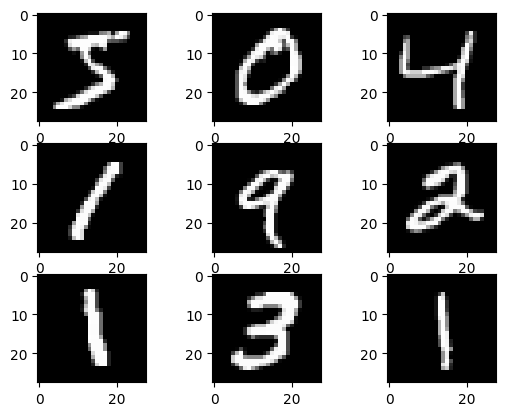

In [5]:
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [6]:
# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [7]:
dataX = train_norm
dataY = trainY

In [8]:
dataTextX = test_norm
dataTestY = testY

In [9]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [8]:
n_folds=5

scores, histories = list(), list()
# prepare cross validation
kfold = KFold(n_folds, shuffle=True, random_state=1)
# enumerate splits
for train_ix, test_ix in kfold.split(dataX):
    # define model
    model = define_model()
    # select rows for train and test
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    # fit model
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # stores scores
    scores.append(acc)
    histories.append(history)





> 98.942
> 99.058
> 98.883
> 99.250
> 98.950


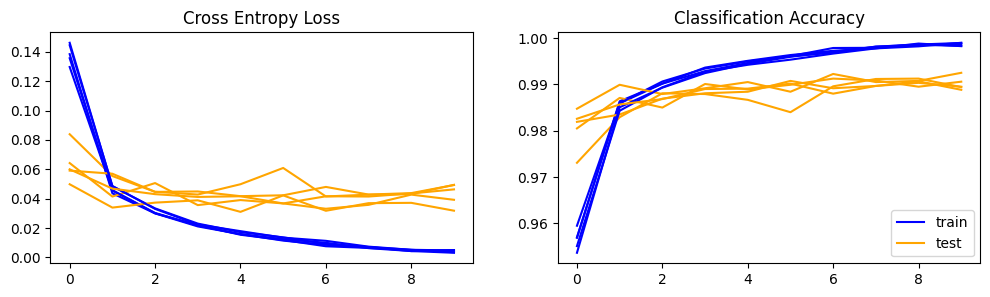

In [24]:
# Create subplots with more horizontal space
plt.subplots(1, 2, figsize=(12, 3), sharey=False)
for i in range(len(histories)):
    # plot loss
    plt.subplot(1, 2, 1)
    plt.title('Cross Entropy Loss')
    plt.plot(histories[i].history['loss'], color='blue') # train
    plt.plot(histories[i].history['val_loss'], color='orange') #test
    # plot accuracy
    plt.subplot(1, 2, 2)
    plt.title('Classification Accuracy')
    plt.plot(histories[i].history['accuracy'], color='blue')
    plt.plot(histories[i].history['val_accuracy'], color='orange')

# Adjust the vertical space between subplots
plt.subplots_adjust(hspace=0.5)
# Place the legend outside the loop
plt.legend(['train', 'test'])
plt.show()

Accuracy: mean=99.017 std=0.130, n=5


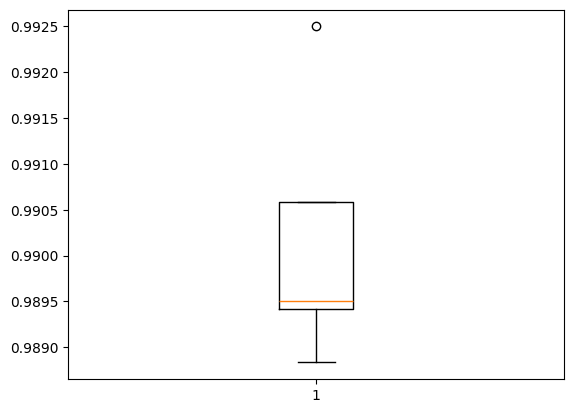

In [10]:
# print summary
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
# box and whisker plots of results
plt.boxplot(scores)
plt.show()

In [10]:
model = define_model()
# fit model
model.fit(dataX, dataY, epochs=10, batch_size=32, verbose=1)



Epoch 1/10


1875/1875 [==============================] - 18s 9ms/step - loss: 0.1245 - accuracy: 0.9619
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0428 - accuracy: 0.9869
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0266 - accuracy: 0.9923
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0199 - accuracy: 0.9939
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0152 - accuracy: 0.9952
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0109 - accuracy: 0.9965
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0096 - accuracy: 0.9968
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0061 - accuracy: 0.9982
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0043 - accuracy: 0.9987
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/step

In [11]:
model.save('final_model.h5')

c:\Users\lucij\.conda\envs\vm-env\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
_, acc = model.evaluate(dataTextX, dataTestY, verbose=1)
print('> %.3f' % (acc * 100.0))

313/313 [==============================] - 1s 4ms/step - loss: 0.0314 - accuracy: 0.9907
> 99.070


In [24]:
# make a prediction for a new image.
from numpy import argmax
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
	# load the image
	start_img = load_img(filename, color_mode = "grayscale", target_size=(28, 28))
	# convert to array
	formatted_img = img_to_array(start_img)
	# reshape into a single sample with 1 channel
	formatted_img = formatted_img.reshape(1, 28, 28, 1)
	# prepare pixel data
	formatted_img = formatted_img.astype('float32')
	formatted_img = formatted_img / 255.0
	return start_img, formatted_img

In [25]:
# load the image
start_img, formatted_img = load_image('img/sample_image.png')

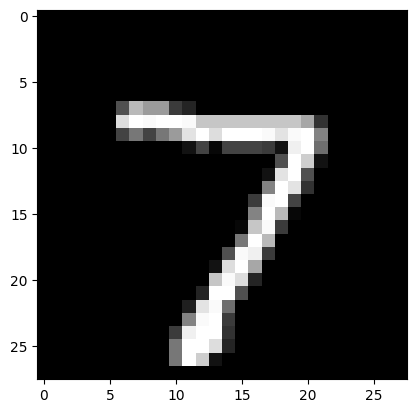

In [26]:
pyplot.imshow(start_img, cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [27]:
# load model
model = load_model('final_model.h5')
# predict the class
predict_value = model.predict(formatted_img, verbose=0)
digit = argmax(predict_value)
print(digit)

7
